In [ ]:
#Importing packages

import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import shutil
import random
import cv2
import pickle

import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
num_cpus = tf.config.experimental.list_physical_devices('CPU')
print(physical_devices)
print(num_cpus)

tf.config.experimental.set_memory_growth(physical_devices[0], True)
tf.config.experimental.set_visible_devices(physical_devices[0], 'GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


**Creating one big dataframe file that bring together all the dataframes of all data**

In [ ]:
dfs=[]
# All csv files are located in "preprocess_csv_files_new - Copie"
for day_file in os.listdir("preprocess_csv_files_new - Copie"):
    csv_dir=os.path.join("preprocess_csv_files_new",day_file)
    df=pd.read_csv(csv_dir,delimiter=';', error_bad_lines=False)
    day=day_file[:-4]+' '
    if 'Time' in df.columns:
        print(day_file)
        df['date_time'] = day + df['Time']
        df["date"]=pd.to_datetime(day)
        # Convert 'date' column to datetime
        #df['date'] = pd.to_datetime(df['date'])
        
        # Append the DataFrame to the list
        dfs.append(df)
    else:
        print(f"Skipping {day_file} due to missing 'Time' column.")
concatenated_df = pd.concat(dfs, ignore_index=True)

# Save the concatenated DataFrame to a new CSV file
concatenated_df.to_csv('concatenated_file.csv', index=False)

**Some preprocessing and visualizing the first 20 rows**

In [24]:
#Loading from the same csv data file and doing same preprocessing steps so all data is trained and tested
#on the same distribution
csv_dir=os.path.join("concatenated_file.csv")
df=pd.read_csv(csv_dir,delimiter=';')

# Convert 'date_time' column to datetime
df["date_time"]= pd.to_datetime(df['date_time'], format='%Y-%m-%d %H:%M:%S ', infer_datetime_format=True)

#Droping some useless column
df=df.drop(['Unnamed: 0',"date","Time"],axis=1)

#Having specific syntax in date_time column
df['date_time']=df['date_time'].apply(lambda x: x.strftime("%Y-%m-%d %H:%M:%S"))
df.head(20)

,PIRP_value,Category,date_time
0,0,class 0,2021-06-27 00:11:00
1,0,class 0,2021-06-27 00:12:00
2,0,class 0,2021-06-27 00:13:00
3,0,class 0,2021-06-27 00:14:00
4,0,class 0,2021-06-27 00:15:00
5,5,class 0,2021-06-27 00:16:00
6,0,class 0,2021-06-27 00:17:00
7,0,class 0,2021-06-27 00:18:00
8,0,class 0,2021-06-27 00:19:00
9,0,class 0,2021-06-27 00:20:00


**Visualizing the last 20 rows**

In [18]:
df.drop(df.index[:-20]).head(20)

,PIRP_value,Category,date_time
519956,0,class 0,2022-12-06 23:41:00
519957,0,class 0,2022-12-06 23:42:00
519958,0,class 0,2022-12-06 23:43:00
519959,0,class 0,2022-12-06 23:44:00
519960,0,class 0,2022-12-06 23:45:00
519961,0,class 0,2022-12-06 23:46:00
519962,0,class 0,2022-12-06 23:47:00
519963,0,class 0,2022-12-06 23:48:00
519964,0,class 0,2022-12-06 23:49:00
519965,0,class 0,2022-12-06 23:50:00


**Plotting a sample of data**

<ipython-input-2-f1ecfadea1cc>:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df["date_time"] = pd.to_datetime(df['date_time'], format='%Y-%m-%d %H:%M:%S', infer_datetime_format=True)


<AxesSubplot:xlabel='date_time'>

<Figure size 2160x2160 with 0 Axes>

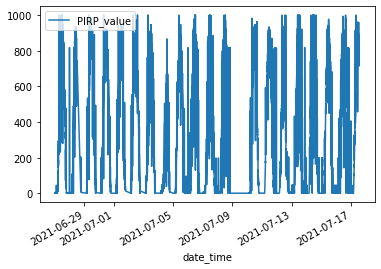

In [2]:
%matplotlib inline
csv_dir=os.path.join("concatenated_file.csv")
df=pd.read_csv(csv_dir,delimiter=';') #add error bad lines= False

df["date_time"] = pd.to_datetime(df['date_time'], format='%Y-%m-%d %H:%M:%S', infer_datetime_format=True)

df=df.drop(["Category"],axis=1)

plt.figure(figsize=(30,30))
subset=df.head(20000)
subset.plot(x="date_time",y="PIRP_value")

**Data Splitting with the same portion as the models before**

In [3]:
# Get the length of the DataFrame 'df'
n = len(df)

# Split the DataFrame into training, validation, and test sets
# The first 70% of the data is used for training
train_df = df[0:int(n * 0.7)]

# The next 20% (70% to 90%) is used for validation
val_df = df[int(n * 0.7):int(n * 0.9)]

# The remaining 10% (90% to 100%) is used for testing
test_df = df[int(n * 0.9):]

**Data Transformation**

In [4]:
# Import the MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

# Initialize a MinMaxScaler instance
scaler = MinMaxScaler()

# Reshape the 'PIRP_value' column of the training, validation and test set
reshaped_train = train_df["PIRP_value"].to_numpy().reshape(-1, 1)
reshaped_val = val_df["PIRP_value"].to_numpy().reshape(-1, 1)
reshaped_test = test_df["PIRP_value"].to_numpy().reshape(-1, 1)

# Scale (normalize) the training data using the MinMaxScaler
train_df = scaler.fit_transform(reshaped_train)

# Scale (normalize) the validation data using the same scaler
val_df = scaler.transform(reshaped_val)

# Update the 'test_df' variable to store the reshaped test data
test_df = reshaped_test

#test_df=scaler.transform(reshaped_test)

**Preparing data to be the input of the models**

In [5]:
def df_to_X_y(df,window_size=60):
    #Preparing data to the input of the model for train and val data
    df_as_np=df
    X=[]
    y=[]
    for i in range(len(df_as_np)-2*window_size):
        row=[a for a in df_as_np[i:i+window_size]]
        #i did i+window_size because the model will be trained on a trained data sequences of size
        # window_size, which will be 60, which means sequences of 1 hour data
        X.append(row)
        #label=df_as_np[i + window_size : i + window_size + 16]
    
    for i in range(window_size,len(df_as_np)-window_size):
        label=[a for a in df_as_np[i:i+16]]
        #i did i+16 because we have to do the forecasting for the next 16 minutes, so models will
        #be trained on labels sequences of size 16 value
        y.append(label)

    return np.array(X), np.array(y)

def df_to_X_y_test(df,window_size=60):
    #Preparing data to the input of the model for test data. 
    df_as_np=df
    X=[]
    y=[]
    print("ok")
    len=51990
    for i in range(0,len-2*window_size,16):
        #print(i/(len(df_as_np)-2*window_size,16)+"%")
        row=[a for a in df_as_np.reshape(1,-1)[0][i:i+window_size]]
        X.append(row)
        #label=df_as_np[i + window_size : i + window_size + 16]
    y=df_as_np

    #Here X will be used to test the model and then the output will be compared to y after
    #doing some transformations... because y represents simply the original data
    return np.array(X), np.array(y)


**Plotting the test data**

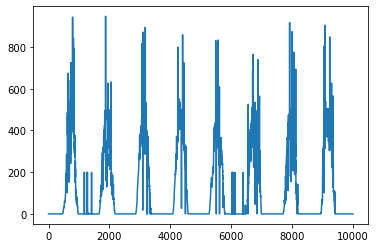

In [9]:
plt.plot(test_df[:10000,0])

In [6]:
#The input data to the models will be 1 hour long sequences
window_size=60

X_train,y_train=df_to_X_y(train_df.tolist(),60)
X_val,y_val=df_to_X_y(val_df.tolist(),60)

X_test,y_test=df_to_X_y_test(test_df,window_size=60)
y_test

ok


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

**Viewing the shapes...**

In [11]:
X_train.shape,y_train.shape

((363863, 60, 1), (363863, 16, 1))

In [12]:
X_train.shape[0]+X_val.shape[0]+X_test.shape[0]

470980

# 1- **Model 1 :**

### 1-1- **Model Architecture**

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.metrics import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *

# Create a Sequential model
model_1 = Sequential()

# Add Convolutional layers with MaxPooling and Dropout
model_1.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(60, 1)))
model_1.add(MaxPooling1D(pool_size=2))
model_1.add(Dropout(0.5))

model_1.add(Conv1D(64, kernel_size=3, activation='relu'))
model_1.add(MaxPooling1D(pool_size=2))
model_1.add(Dropout(0.5))

model_1.add(Conv1D(128, kernel_size=3, activation='relu'))
model_1.add(MaxPooling1D(pool_size=2))
model_1.add(Dropout(0.5))

# Flatten layer
model_1.add(Flatten())

# Add Dense layers with Dropout
model_1.add(Dense(128, activation='relu'))
model_1.add(Dropout(0.5))

model_1.add(Dense(64, activation='relu'))
model_1.add(Dropout(0.5))

model_1.add(Dense(32, activation='relu'))

# Output layer
model_1.add(Dense(16, activation='softmax'))

# Print model summary
model_1.summary()



Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 58, 32)            128       
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 29, 32)           0         
 g1D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 29, 32)            0         
                                                                 
 conv1d_13 (Conv1D)          (None, 27, 64)            6208      
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, 13, 64)           0         
 g1D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 13, 64)           

### 1-2- **Model Training**

In [ ]:
#Because i trained the model many times to monitor the los evolution, i have to load it again if the session shut down..
#But i overwrite this cell later to train another models and the results in the first place in the terminal
#were gone... That's why here i do not have the loss evolution for each epoch written in terminal
#But  i still got the loss evolution graph

model_1=tf.keras.models.load_model("time_series\\CONV1D+Maxpool.h5")

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.metrics import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *

my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='loss', patience = 10, mode = 'auto'),
    tf.keras.callbacks.ModelCheckpoint(monitor='loss',mode='min',save_best_only=True,filepath=os.path.join("time_series1",'model.{epoch:02d}-{val_loss:.2f}.h5'))
]

model_3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss=MeanAbsoluteError(), metrics=[RootMeanSquaredError()])

# Training loop
num_epochs=150

model_1.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=num_epochs,callbacks=my_callbacks,verbose=1)

model_1.save("time_series\\CONV1D+Maxpool.h5")


**Preparing Test data**

In [15]:
print(X_test.shape)
print(X_test[:262, :, np.newaxis].shape)

x_testt=(X_test[:262,:,np.newaxis])
print(x_testt.shape)

(3242, 60)
(262, 60, 1)
(262, 60, 1)


### 3-3- **Model Prediction**

In [16]:
#Loading the best model among all best check pointed models during training stored in time_series3 folder
#And renaming the best model (the best model is choosen according to his val loss performances) and putting it
#in models folder
model_1=tf.keras.models.load_model("models\CONV1D+Maxpool.h5")

# We should scaler our testt data before entering it into the model
y_pred=model_1.predict(scaler.transform(x_testt.reshape(-1, 1)).reshape(262,60,1))

9/9 [==============================] - 8s 3ms/step


In [17]:
#We should do the inverse transformation of scaling..
y_pred=scaler.inverse_transform(y_pred)
y_pred.shape

(262, 16)

### 1-4- **Plotting the results**

13/13 [==============================] - 6s 4ms/step


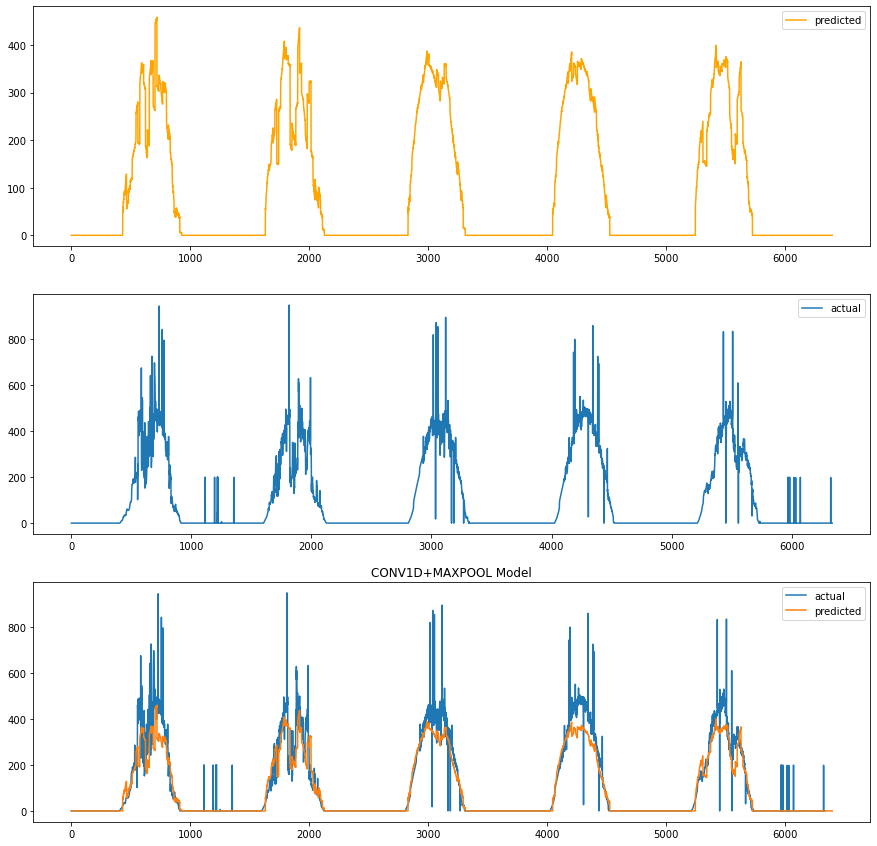

In [18]:

def predict_and_plot(nbr_seq,model,title): #x_test should be a sequence of shape (nbre_of_seq,60,1)

    x_testt=(X_test[:nbr_seq,:,np.newaxis])
    # We should scaler our testt data before entering it into the model
    y_pred=model.predict(scaler.transform(x_testt.reshape(-1, 1)).reshape(nbr_seq,60,1))
    y_pred=scaler.inverse_transform(y_pred)
    y_pred.shape

    plt.figure(figsize=(15,15))
    
    plt.subplot(3,1,1)
    plt.plot(y_pred.reshape(-1),label="predicted",color="orange")
    plt.legend()
    
    plt.subplot(3,1,2)
    plt.plot(y_test.reshape(-1)[60:nbr_seq*16],label="actual")
    plt.legend()
    
    plt.subplot(3,1,3)
    plt.plot(y_test.reshape(-1)[60:nbr_seq*16],label="actual")
    plt.plot(y_pred.reshape(-1),label="predicted")
    y_actual=y_test.reshape(-1)[60:nbr_seq*16]
    yz=y_pred.reshape(-1)
    plt.title(title)
    plt.legend()

    return y_actual,yz

y_actual,y_predicted = predict_and_plot(400,model_1,"CONV1D+MAXPOOL Model")


**Plotting the result for the entire test set (around 51140 data point)**

100/100 [==============================] - 8s 5ms/step


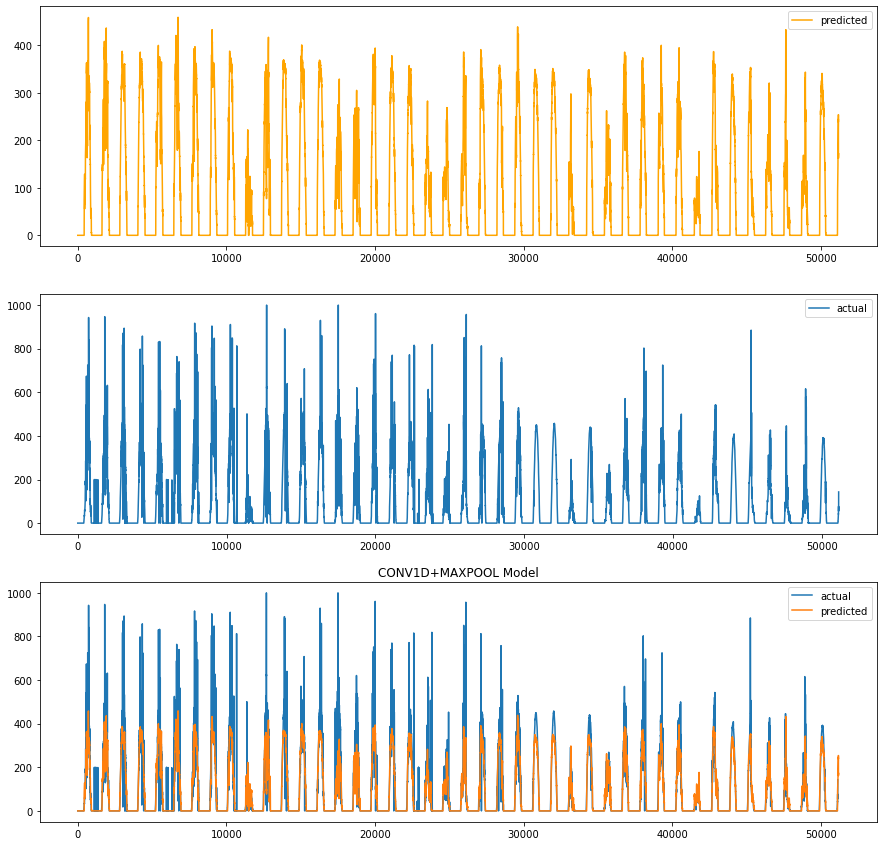

In [19]:
y_actual,y_predicted = predict_and_plot(3200,model_1,"CONV1D+MAXPOOL Model")

**Making the actual and predicted irradiance values the same length**

In [20]:
y_predicted=y_predicted[:y_actual.shape[0]]
print(y_predicted.shape)
print(y_actual.shape)

(51140,)
(51140,)


# 1-5 **Model Evaluation on same test data as the models before**

**MAE, MSE, RMSE and R2 on test set**

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming you have both arrays y_pred and y_actual
print("for model 1: CONV1D+MAXPOOL")
print("Here are the metrics for the test set: ")
print("")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_actual, y_predicted)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_actual, y_predicted)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared (R2)
r2 = r2_score(y_actual, y_predicted)
print("R-squared (R2):", r2)

for model 1: CONV1D+MAXPOOL
Here are the metrics for the test set: 

Mean Absolute Error (MAE): 21.314064024452502
Mean Squared Error (MSE): 2598.5689139609503
Root Mean Squared Error (RMSE): 50.97616025124833
R-squared (R2): 0.8701631565290341


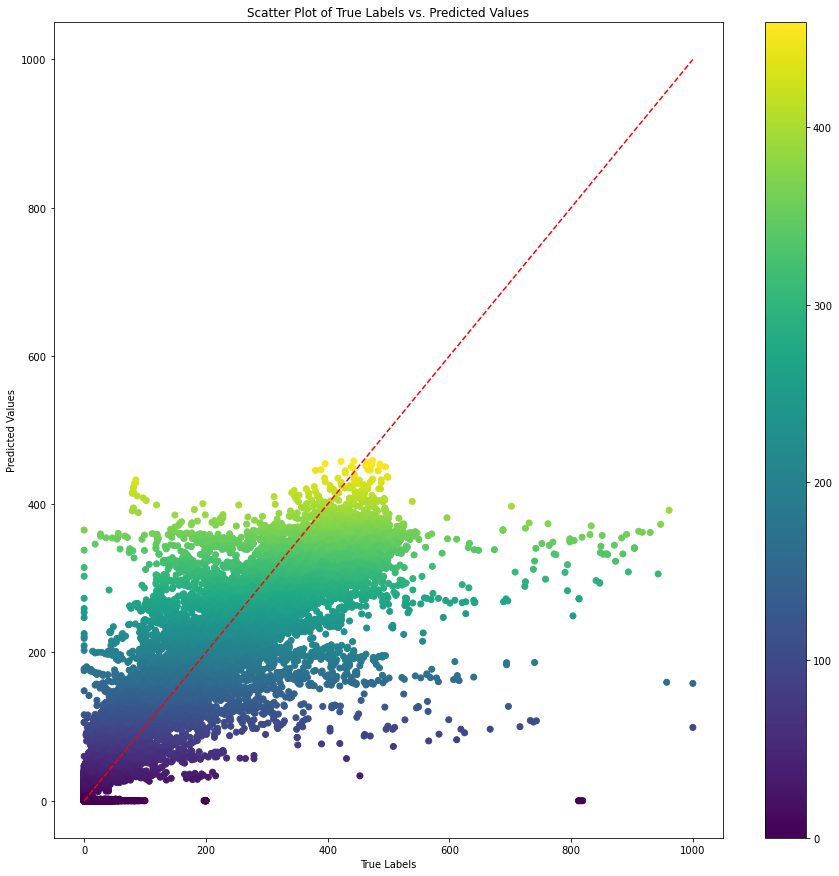

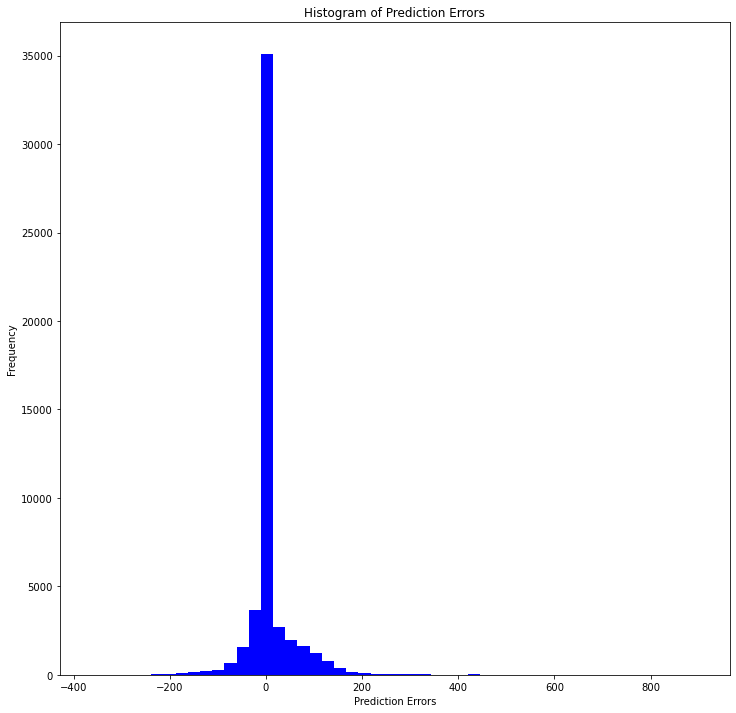

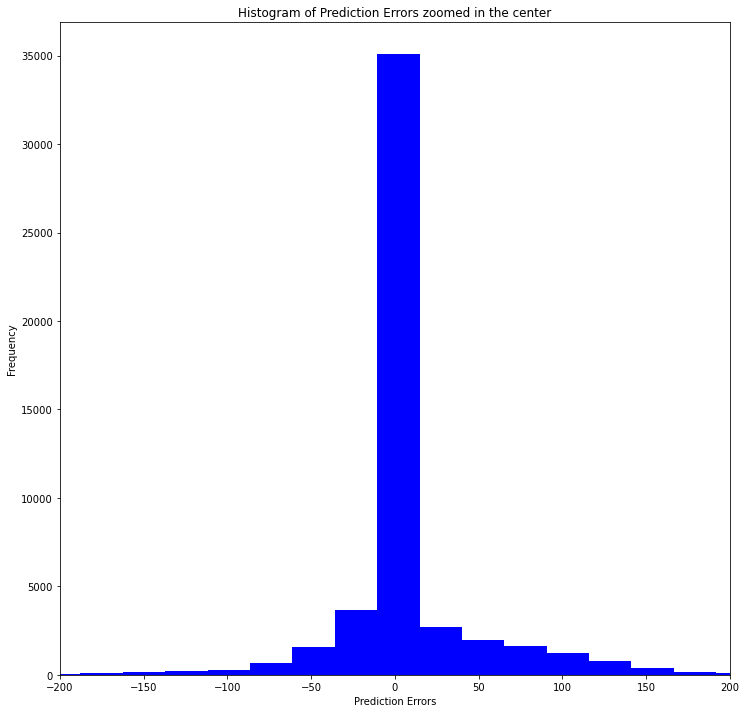

Total Number of data points is:  51140


In [22]:
import matplotlib.pyplot as plt

# Create a scatter plot of predicted values vs. true labels
plt.figure(figsize=(15,15))
plt.scatter(y_actual, y_predicted, c=y_predicted, cmap='viridis')
plt.xlabel("True Labels")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of True Labels vs. Predicted Values")
plt.colorbar()
# Add the diagonal line (y = x) for perfect prediction
plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], color='red', linestyle='--')
plt.show()

# Create a histogram of prediction errors
errors = y_actual - y_predicted
plt.figure(figsize=(12,12))
plt.hist(errors, bins=50, color='blue')
plt.xlabel("Prediction Errors")
plt.ylabel("Frequency")
plt.title("Histogram of Prediction Errors")
plt.show()

# Create a zoomed in histogram of prediction errors
errors = y_actual - y_predicted
plt.figure(figsize=(12,12))
plt.hist(errors, bins=50, color='blue')
plt.xlabel("Prediction Errors")
plt.ylabel("Frequency")
plt.title("Histogram of Prediction Errors zoomed in the center")
plt.xlim(-200, 200)
plt.show()

print("Total Number of data points is: ", len(y_actual))

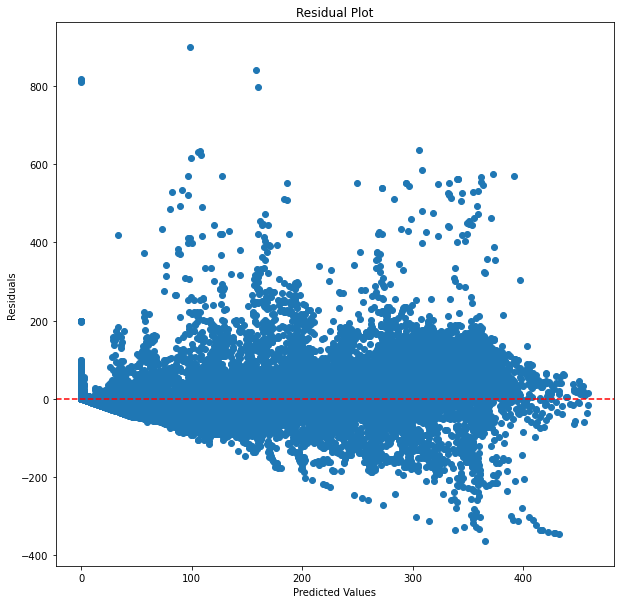

In [23]:
# Calculate residuals
residuals = y_actual - y_predicted

# Create a residual plot
plt.figure(figsize=(10,10))
plt.scatter(y_predicted, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


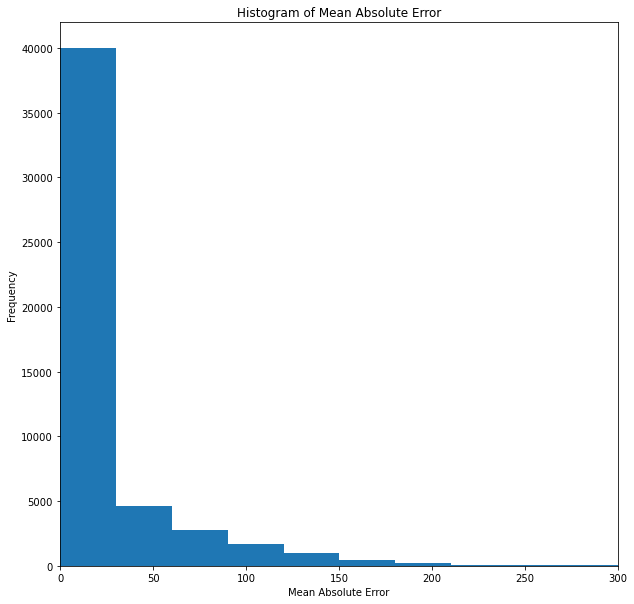

In [24]:
# Calculate Mean Absolute Error (MAE) for each sample
mae_per_sample = np.abs(y_actual - y_predicted)

# Create a histogram of MAE
plt.figure(figsize=(10,10))
plt.hist(mae_per_sample, bins=30)
plt.xlabel("Mean Absolute Error")
plt.ylabel("Frequency")
plt.xlim(0, 300)
plt.title("Histogram of Mean Absolute Error")
plt.show()
